In [1]:
# Load Data
import pandas as pd
import pathlib

csv_file = pathlib.Path('/Users/eugene/OneDrive - Nexus365/PhD/4. Rotation 2/panddascore/training_results/2022_09_15-04_57_21_PM}/output_labels.csv')
# csv_file = pathlib.Path('/dls/labxchem/data/2018/lb18145-80/processing/analysis/eugene/pandda_score/training_results/2022_09_20-07_29_42_PM/output_labels.csv')
dataframe = pd.read_csv(csv_file)

In [7]:
# Confusion Matrix
import pandas as pd
import pathlib
from analysis_notebooks.plotting import confusion_matrix

#####

true_pos, true_neg, false_pos, false_neg, results_frame_2 = confusion_matrix.compute_true_false_positives_and_negatives(dataframe, threshold=0.5)
true_pos_count, true_neg_count, false_pos_count, false_neg_count = confusion_matrix.compute_confusion_matrix(true_pos,
                                                                                            true_neg,
                                                                                            false_pos,
                                                                                            false_neg)

print(results_frame_2['pred_labels_from_threshold'].tolist())
cm = confusion_matrix.compute_and_plot_confusion_matrix(dataframe, thres=0.7)
tpr = confusion_matrix.find_true_positive_rate(cm)
fpr = confusion_matrix.find_false_positive_rate(cm)
precision = confusion_matrix.find_precision(cm)
accuracy = confusion_matrix.find_accuracy(cm)

true_pos_count=0
true_neg_count=107
false_pos_count=0
false_neg_count=0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


ValueError: cannot reshape array of size 1 into shape (2,2)

ValueError: cannot reshape array of size 1 into shape (2,2)

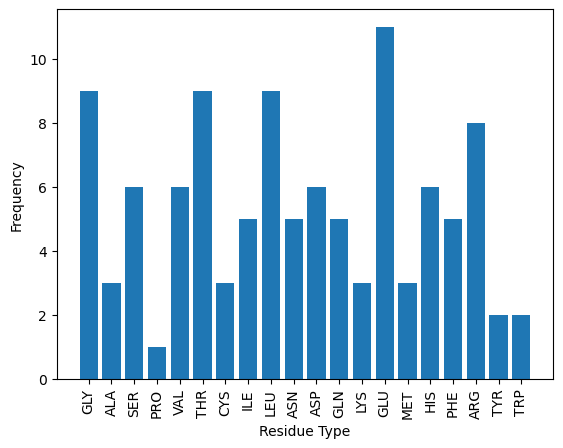

In [5]:
import pathlib
import pandas as pd
from analysis_notebooks.plotting import confusion_matrix, residue_lists
import matplotlib.pyplot as plt


####


def separate_results_by_residue(results_frame: pd.DataFrame, 
                                residues: list[str]) -> list[pd.DataFrame]:

    def results_per_residue_type(results_frame: pd.DataFrame, 
                            residue: str) -> pd.DataFrame:
        results_frame_new = results_frame[results_frame['residue_type'] == residue]
        return results_frame_new

    list_results_frame = [results_frame] * len(residues)
    results = list(map(results_per_residue_type, list_results_frame, residues))
    
    return results


def find_residue_frequency(results: list[pd.DataFrame], residues: list[str]) -> list[int]:
    num_residues = list(map(len, results))

    plt.figure()
    plt.bar(residues, num_residues)
    plt.ylabel('Frequency')
    plt.xlabel('Residue Type')
    plt.xticks(rotation=90)

    return num_residues

def sort_residues_by_frequency(residues: list[str], num_residues: list[int]) -> list[str]:
    residues_sorted = [x for _,x in sorted(zip(num_residues,residues))]
    num_residues_sorted = sorted(num_residues)

    return residues_sorted, num_residues_sorted



####

def plot_confusion_matrix_per_residue(results: list[pd.DataFrame], residues: list[str]):
    confusion_matrices = list(map(confusion_matrix.compute_and_plot_confusion_matrix, results, residues))
    return confusion_matrices

def compute_statistics_per_residue(confusion_matrices):
    tpr = list(map(confusion_matrix.find_true_positive_rate, confusion_matrices))
    fpr = list(map(confusion_matrix.find_false_positive_rate, confusion_matrices))
    precision = list(map(confusion_matrix.find_precision, confusion_matrices))
    accuracy = list(map(confusion_matrix.find_accuracy, confusion_matrices))

    return tpr, fpr, precision, accuracy

###

def plot_statistics(tpr,
                    fpr,
                    precision,
                    accuracy,
                    residues: list[str],):
    plt.figure()
    plt.bar(residues, tpr)
    plt.ylabel('TPR')
    plt.xlabel('Residue Type')
    plt.xticks(rotation=90)
    plt.ylim(0, 1)

    plt.figure()
    plt.bar(residues, fpr)
    plt.ylabel('FPR')
    plt.xlabel('Residue Type')
    plt.xticks(rotation=90)
    plt.ylim(0, 1)


    plt.figure()
    plt.bar(residues, precision)
    plt.ylabel('Precision')
    plt.xlabel('Residue Type')
    plt.xticks(rotation=90)
    plt.ylim(0, 1)

    plt.figure()
    plt.bar(residues, accuracy)
    plt.ylabel('Accuracy')
    plt.xlabel('Residue Type')
    plt.xticks(rotation=90)
    plt.ylim(0, 1)

    return None


####
results_frame_new = confusion_matrix.classify_residues(dataframe)

residues = residue_lists.residue_list_sorted_by_molweight()

results_by_residue_sorted_by_molweight = separate_results_by_residue(results_frame_new, 
                                                                    residues)
residue_frequencies = find_residue_frequency(results_by_residue_sorted_by_molweight, 
                                            residues)

confusion_matrices_sorted_by_residue_molweight = plot_confusion_matrix_per_residue(results_by_residue_sorted_by_molweight, 
                                                                                    residues)
tpr_molweight, fpr_molweight, precision_molweight, accuracy_molweight = compute_statistics_per_residue(confusion_matrices_sorted_by_residue_molweight)
plot_statistics(tpr_molweight, 
                fpr_molweight,
                precision_molweight, 
                accuracy_molweight, 
                residues)

#####
residues_sorted_by_frequency, num_residues_sorted_frequency = sort_residues_by_frequency(residues, 
                                                                                        residue_frequencies)
results_by_residue_sorted_by_frequency = separate_results_by_residue(results_frame_new, 
                                                                    residues_sorted_by_frequency)

confusion_matrices_sorted_by_residue_frequency = plot_confusion_matrix_per_residue(results_by_residue_sorted_by_frequency, 
                                                                                    residues_sorted_by_frequency)

tpr_frequency, fpr_frequency, precision_frequency, accuracy_frequency = compute_statistics_per_residue(confusion_matrices_sorted_by_residue_frequency)
plot_statistics(tpr_frequency,
                fpr_frequency, 
                precision_frequency,
                accuracy_frequency,
                residues_sorted_by_frequency)
###


residues = residue_lists.residue_list_sorted_by_chem_similarity()
results_by_residue_sorted_by_chem = separate_results_by_residue(results_frame_new, 
                                                                    residues)
residue_frequencies = find_residue_frequency(results_by_residue_sorted_by_chem, 
                                            residues)

confusion_matrices_sorted_by_residue_chem = plot_confusion_matrix_per_residue(results_by_residue_sorted_by_chem, 
                                                                                    residues)
tpr_chem, fpr_chem, precision_chem, accuracy_chem = compute_statistics_per_residue(confusion_matrices_sorted_by_residue_chem)
plot_statistics(tpr_chem, 
                fpr_chem,
                precision_chem, 
                accuracy_chem, 
                residues)


plt.figure()
plt.bar(residues_sorted_by_frequency, num_residues_sorted_frequency)
plt.ylabel('Frequency')
plt.xlabel('Residue Type')
plt.xticks(rotation=90)


